<a href="https://colab.research.google.com/github/Sneha-P-Karunakaran/Deep-Learning-Projects/blob/main/CNN_Mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense,Dropout,Activation


In [ ]:
#Preprocessing
(xtrain,ytrain),(xtest,ytest)=mnist.load_data()
xtrain.shape
xtest.shape

(10000, 28, 28)

In [ ]:
unique,counts=np.unique(ytrain,return_counts=True)
print(unique,counts)

[0 1 2 3 4 5 6 7 8 9] [5923 6742 5958 6131 5842 5421 5918 6265 5851 5949]


In [ ]:
index=np.random.randint(0,xtrain.shape[0],size=25)
index

array([47242, 15101,  8561, 19856, 23680, 20271, 59133, 28230, 36920,
       26314, 23552, 21978, 30888,   110,  2495, 41897, 56592,  8350,
       22507, 26274, 14251, 34470, 41094, 52471, 56763])

In [ ]:
image=xtrain[index]
label=ytrain[index]
print(image.shape)
print(label.shape)

(25, 28, 28)
(25,)


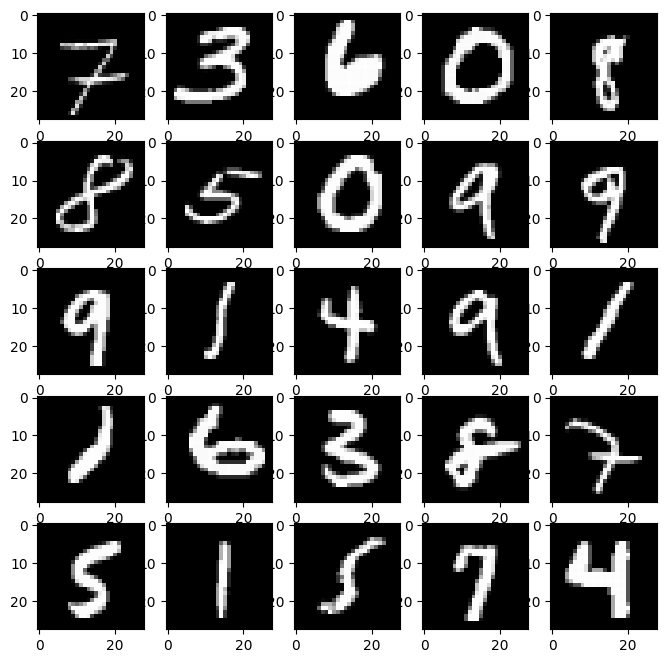

In [ ]:
plt.figure(figsize=(8,8))
for i in range(len(index)):
  plt.subplot(5,5,i+1)
  images=image[i]
  plt.imshow(images,cmap="gray")
  plt.show

In [ ]:
#Finding ytrain values(unique)
from keras.utils import to_categorical
num_labels=len(np.unique(ytrain))
print(num_labels)
print(ytrain[0])
ytrain=to_categorical(ytrain)
ytest=to_categorical(ytest)
print(ytrain[0])

10
5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [ ]:
imagesize=xtrain.shape[1]
imagesize
inputsize=imagesize*imagesize
inputsize

784

In [ ]:
xtrain=np.reshape(xtrain,[-1,inputsize])
xtrain=xtrain.astype("float32")/255
xtest=np.reshape(xtest,[-1,inputsize])
xtest=xtest.astype("float32")/255

In [ ]:
#creation of layers
batchsize=128
dropout=0.45
model=Sequential()

#input
model.add(Dense(256,input_dim=inputsize))
model.add(Activation("relu"))
model.add(Dropout(dropout))

#hidden
model.add(Dense(256,input_dim=inputsize))
model.add(Activation("relu"))
model.add(Dropout(dropout))

#output
model.add(Dense(num_labels))
model.add(Activation("softmax"))

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 256)                 │         200,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_4 (Activation)            │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 10)                  │           2,570 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_5 (Activation)            │ (None, 10)                  │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 269,322 (1.03 MB)

 Trainable params: 269,322 (1.03 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#fitting
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])
model.fit(xtrain,ytrain,epochs=20,batch_size=batchsize)


Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.7672 - loss: 0.7206
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.9394 - loss: 0.2043
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9545 - loss: 0.1500
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9608 - loss: 0.1264
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.9659 - loss: 0.1143
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.9669 - loss: 0.1041
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9708 - loss: 0.0940
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9726 - loss: 0.0889
Epoch 9/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.9761 - loss: 0.0770
Epoch 10/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.9758 - loss: 0.0749
Epoch 11/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.9775 - loss: 0.0725
Epoch 12/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12

In [ ]:
#Evaluating the model accuracy
loss,accuracy=model.evaluate(xtest,ytest,batch_size=batchsize)
print(accuracy*100)
loss*100

79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9791 - loss: 0.0750
98.22999835014343


6.397684663534164